In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Initialise data
cols = ["Date", "Adj_Close"]
df = pd.read_csv("MSFT.csv").drop(["Open","High","Low","Volume", "Close"], axis = 1)
df.columns = cols
print(df.head())

         Date  Adj_Close
0  1986-03-13   0.060055
1  1986-03-14   0.062199
2  1986-03-17   0.063272
3  1986-03-18   0.061663
4  1986-03-19   0.060591


Shape of data frame: (9651, 2)


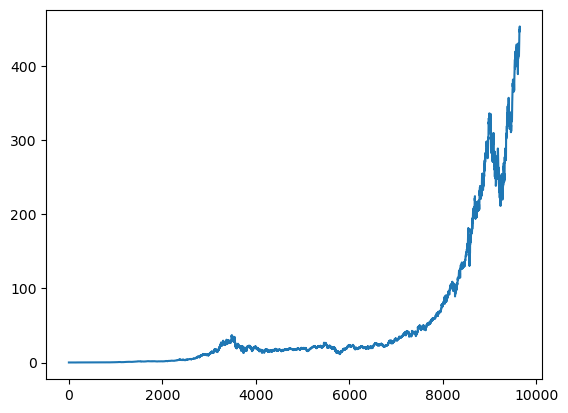

In [134]:
# Test Data
plt.plot(df["Adj_Close"])
print("Shape of data frame:", df.shape)

In [150]:
# Randomise Seed
tf.random.set_seed(7)
# Initialise training and test sets
prices = df["Adj_Close"].values

scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices.reshape(-1,1))

def df_to_X_y(df, window_size = 5):
    X = []
    y = []
    for i in range(len(df) - window_size):
        row = [[a] for a in df[i:i+window_size]]
        X.append(row)
        label = df[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
    
WINDOW_SIZE =  20
X, y = df_to_X_y(prices, WINDOW_SIZE)

train_size = int(len(y) * 0.8)
X_train = X[:train_size]
Y_train = y[:train_size]
X_test = X[train_size:]
Y_test = y[train_size:]

In [151]:
# Define Model
nn_model = tf.keras.Sequential([
tf.keras.layers.LSTM(units = 100, input_shape = (WINDOW_SIZE,1), return_sequences=True),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.LSTM(units = 100, return_sequences=False),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1)
])
nn_model.build()
print(nn_model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 20, 100)           40800     
                                                                 
 dropout_21 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_22 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_22 (Dropout)        (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


2024-07-01 22:02:13.373083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 22:02:13.373683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 22:02:13.374292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [152]:
#train
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50


2024-07-01 22:02:16.764006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 22:02:16.764854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 22:02:16.765440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

241/241 - 5s - loss: 4.0628e-05 - 5s/epoch - 20ms/step
Epoch 2/50
241/241 - 3s - loss: 1.0862e-05 - 3s/epoch - 14ms/step
Epoch 3/50
241/241 - 3s - loss: 8.8230e-06 - 3s/epoch - 13ms/step
Epoch 4/50
241/241 - 3s - loss: 8.4748e-06 - 3s/epoch - 13ms/step
Epoch 5/50
241/241 - 3s - loss: 7.8712e-06 - 3s/epoch - 14ms/step
Epoch 6/50
241/241 - 3s - loss: 7.7813e-06 - 3s/epoch - 14ms/step
Epoch 7/50
241/241 - 3s - loss: 7.7133e-06 - 3s/epoch - 14ms/step
Epoch 8/50
241/241 - 3s - loss: 7.0184e-06 - 3s/epoch - 14ms/step
Epoch 9/50
241/241 - 3s - loss: 5.9833e-06 - 3s/epoch - 14ms/step
Epoch 10/50
241/241 - 3s - loss: 5.9615e-06 - 3s/epoch - 14ms/step
Epoch 11/50
241/241 - 3s - loss: 6.3373e-06 - 3s/epoch - 14ms/step
Epoch 12/50
241/241 - 3s - loss: 5.5319e-06 - 3s/epoch - 14ms/step
Epoch 13/50
241/241 - 3s - loss: 5.7742e-06 - 3s/epoch - 14ms/step
Epoch 14/50
241/241 - 3s - loss: 7.5036e-06 - 3s/epoch - 14ms/step
Epoch 15/50
241/241 - 3s - loss: 5.6037e-06 - 3s/epoch - 14ms/step
Epoch 16/50
241

In [146]:
train_pred = nn_model.predict(X_train)
test_pred = nn_model.predict(X_test)

# invert predictions
#train_pred = scaler.inverse_transform(train_pred)
#Y_train = scaler.inverse_transform(Y_train)
#test_pred = scaler.inverse_transform(test_pred)
#Y_test = scaler.inverse_transform(Y_test)

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(Y_train, train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(Y_test, test_pred))
print('Test Score: %.2f RMSE' % (testScore))



2024-07-01 22:01:41.342355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-01 22:01:41.342993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-01 22:01:41.343652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

61/61 [==============================] - 0s 1ms/step
Train Score: 0.00 RMSE
Test Score: 0.08 RMSE


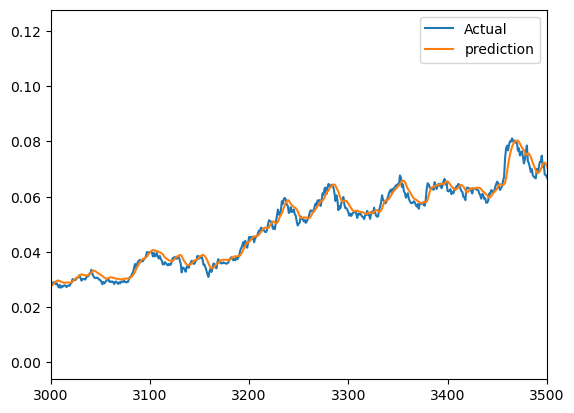

In [147]:
plt.plot(Y_train, label = "Actual")
plt.plot(train_pred, label = "prediction")
plt.xlim(3000,3500)
plt.legend()
plt.show()

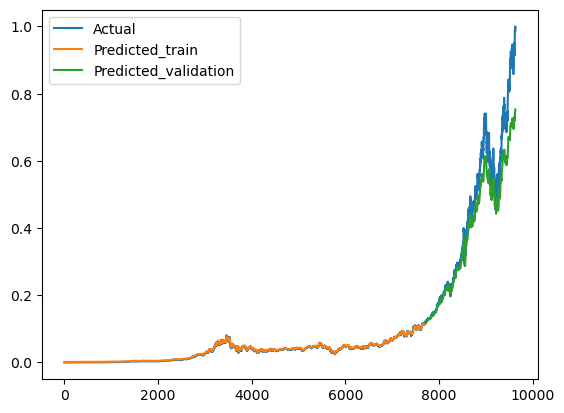

In [148]:
plt.plot(np.concatenate((Y_train, Y_test)), label="Actual")
plt.plot(range(len(train_pred)),train_pred, label="Predicted_train")
plt.plot(range(len(train_pred),len(train_pred)+len(test_pred)),test_pred, label="Predicted_validation")
plt.legend()
plt.show()

In [149]:
# Forecast
X = X_train
for i in range(200):
    prediction = nn_model.predict(X)    
    new = np.append(X[-1][1:], prediction[-1][0])
    new = new.reshape(len(new), 1)
    X = np.append(X, new)
    X = np.reshape(X, (int(len(X)/WINDOW_SIZE), WINDOW_SIZE, 1, 1))
    print(i)

241/241 [==============================] - 0s 1ms/step
0
241/241 [==============================] - 0s 1ms/step
1
241/241 [==============================] - 0s 1ms/step
2
241/241 [==============================] - 0s 1ms/step
3
241/241 [==============================] - 0s 1ms/step
4
241/241 [==============================] - 0s 1ms/step
5
241/241 [==============================] - 0s 1ms/step
6
241/241 [==============================] - 0s 1ms/step
7
 91/241 [==========>...................] - ETA: 0s

KeyboardInterrupt: 

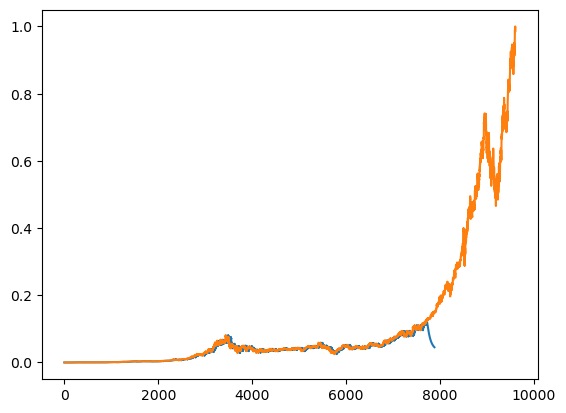

In [127]:
plt.plot(X.flatten()[WINDOW_SIZE::WINDOW_SIZE])
plt.plot(np.concatenate((Y_train, Y_test)), label="Present")
plt.show()